Trial Number 1
Number of Coins: 1
Heads: 11
Tails: 9

Trial Number 2
Number of Coins: 4
Heads: 46
Tails: 34

Trial Number 3
Number of Coins: 10
Heads: 98
Tails: 102



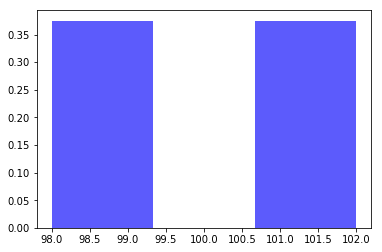

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from random import getrandbits

number_of_coins = [1, 4, 10]
experiments = 20

for i, coins in enumerate(number_of_coins):
    value_heads = 0
    value_tails = 0
    for _ in range(experiments):
        for coin in range(coins):
            if getrandbits(1):
                value_heads = value_heads + 1
            else:
                value_tails = value_tails + 1
    print("Trial Number %s" % (i + 1))
    print("Number of Coins: %s" % coins)
    print("Heads: %s" % value_heads)
    print("Tails: %s" % value_tails)
    print("")
    
n, bins, patches = plt.hist([value_heads, value_tails], 3, normed=1, facecolor='#2524fc', alpha=0.75)
plt.show()

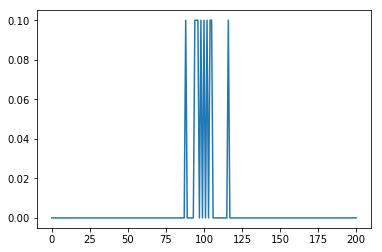

In [212]:
# Try changing me
random_variables = 200
experiments = 10

inclusive_total = random_variables + 1 # Add 1 to account for all sums
graph_bins = np.arange(0, inclusive_total, 1)
bins = np.zeros(inclusive_total, dtype=np.float64)  
normalized_bins = np.zeros(inclusive_total, dtype=np.float64)

# Calculate the sum of random variables
for _ in range(experiments):
    value = 0
    for i in range(random_variables):
        if getrandbits(1):
            value = value + 1
    bins[value] = bins[value] + 1

for i, value in enumerate(bins):
    normalized_bins[i] = (value / experiments)
    
plt.plot(graph_bins, normalized_bins)
plt.show()

# Lecture 7 Recreation

## True Dataset

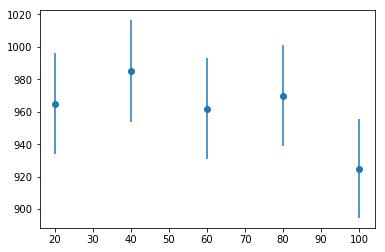

In [96]:
x = np.arange(20, 120, 20)
# y = np.array([940, 1010, 960, 955, 890])  # Observed Values
y = np.array([965, 985, 960, 970, 925])  # Observed Values
e = np.sqrt(y)  # Uncertainty

fig, ax = plt.subplots()
plt.plot(linestyle="None")
ax.errorbar(x, y, e, linestyle='None', marker='o')
plt.show()

## Model

In [97]:
def linear_model(a, photon_energy):
    """Linear Model

    Args:
        a: Slope
        photon_energy: Observed photon energy.

    Returns:
        Value from the linear function.
    """
    return (a * photon_energy) + 1000

## Minimizing Function

In [98]:
def minimizing_function(a, photon_energy, observed_values):
    """Chi Squared Minimizing Function

    Args:
        a: Slope
        photon_energy: Array of energy observed
        observed_values: Array of number of observed photons.

    Returns:
        Value from the chi squared function.
    """
    value = 0
    for i, observed_value in enumerate(observed_values):
        predicated_value = linear_model(a, photon_energy[i]) # Retrieve the value for the predicted value from the model
        value = value + np.square((observed_value - predicated_value) / np.sqrt(observed_value))
    return value

## Find the minimum a value

In [99]:
import sys


possible_minimum_a = np.arange(-.8, -.6, .0001)  # Generate values to brute force a
minimum = sys.maxsize  # Set the max size so any value will be less than the minimum
minimum_a = 0  # Keep track of the minimum a value used

for i in possible_minimum_a:
    temp_min = minimizing_function(i, x, y)
    if temp_min < minimum:
        minimum = temp_min
        minimum_a = i

print(minimum)
print(minimum_a)

1.20584145052
-0.6161


## Reconstructed Spectrum

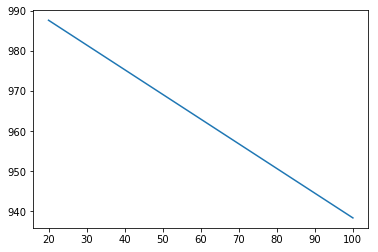

In [113]:
a = np.arange(20, 120, 20)
b = np.empty([len(a)]) 
for i, value in enumerate(a):
    b[i] = linear_model(minimum_a, value)

fig, ax = plt.subplots()
plt.plot(a, b)
plt.show()

## Fitted Linear Model 

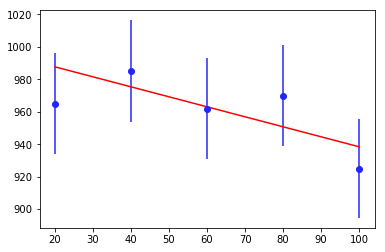

In [119]:
plt.plot(a, b, color='red')
plt.errorbar(x, y, e, linestyle='None', color='#2524fc', marker='o')
plt.show()